# MinDE System with Mesoscopic Simulator

Fange D, Elf J (2006) Noise-Induced Min Phenotypes in E. coli. PLoS Comput Biol 2(6): e80. doi:10.1371/journal.pcbi.0020080

In [1]:
%matplotlib inline
from ecell4 import *

Declaring `Species` and `ReactionRule`s:

In [2]:
with species_attributes():
    D | DE | {"D": "0.01", "location": "M"}
    D_ADP | D_ATP | E | {"D": "2.5", "location": "C"}

with reaction_rules():
    D_ATP + M > D | 0.0125
    D_ATP + D > D + D | 9e+6 * (1e+15 / N_A)
    D + E > DE | 5.58e+7 * (1e+15 / N_A)
    DE > D_ADP + E | 0.7
    D_ADP > D_ATP | 0.5

m = get_model()

Make a `World`. The second argument, `0.05`, means its subvolume length:

In [3]:
w = meso.MesoscopicWorld(Real3(4.6, 1.1, 1.1), 0.05)
w.bind_to(m)

Make a structures. `Species` `C` is for cytoplasm, and `M` is for membrane:

In [4]:
rod = Rod(3.5, 0.55, w.edge_lengths() * 0.5)
w.add_structure(Species("C"), rod)
w.add_structure(Species("M"), rod.surface())

Throw-in molecules:

In [5]:
w.add_molecules(Species("D_ATP"), 2001)
w.add_molecules(Species("D_ADP"), 2001)
w.add_molecules(Species("E"), 1040)

Run a simulation for 120 seconds. Two `Observer`s below are for logging. `obs1` logs only the number of molecules, and `obs2` does a whole state of the `World`.

In [6]:
sim = meso.MesoscopicSimulator(w)
obs1 = FixedIntervalNumberObserver(0.1, [sp.serial() for sp in m.list_species()])
obs2 = FixedIntervalHDF5Observer(1.0, 'minde%03d.h5')

In [7]:
from ecell4.util.progressbar import progressbar

In [8]:
duration = 120
progressbar(sim, timeout=1).run(duration, (obs1, obs2))

  [############################]    100.0%  Elapsed:  00:28:11 ETA:  00:00:00


Visualize the final state of the `World`:

In [9]:
viz.plot_world(w, radius=0.01, species_list=('D', 'DE'))

Plot a time course of the number of molecules:

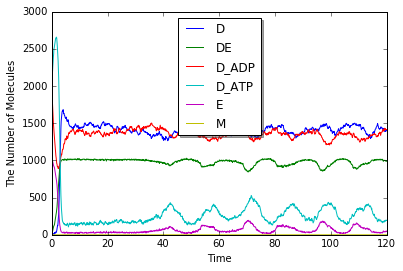

In [10]:
viz.plot_number_observer(obs1)

In [11]:
viz.plot_movie_with_matplotlib(obs2, species_list=('D', 'DE'))